<a href="https://colab.research.google.com/github/Nishanth654/customer_segmentation/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/online_retail.csv', parse_dates=['InvoiceDate'])

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266332 entries, 0 to 266331
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        266332 non-null  int64         
 1   InvoiceNo    266332 non-null  object        
 2   StockCode    266332 non-null  object        
 3   Description  265361 non-null  object        
 4   Quantity     266331 non-null  float64       
 5   InvoiceDate  266331 non-null  datetime64[ns]
 6   UnitPrice    266331 non-null  float64       
 7   CustomerID   190056 non-null  float64       
 8   Country      266331 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.3+ MB
None
   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1      1    536365     71053                  WHITE METAL LANTERN       6.0   
2      2    5363

In [5]:
# Drop rows with missing CustomerID, since customer segmentation depends on it
df_cleaned = df.dropna(subset=['CustomerID'])

# Remove transactions with negative or zero quantity
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Remove transactions with invalid or zero prices
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]


In [6]:
# Group by product and sum the quantities sold
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print(top_products)


Description
MEDIUM CERAMIC TOP STORAGE JAR        75563.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     33076.0
JUMBO BAG RED RETROSPOT               23532.0
WHITE HANGING HEART T-LIGHT HOLDER    23484.0
PACK OF 72 RETROSPOT CAKE CASES       21629.0
SMALL POPCORN HOLDER                  17968.0
ASSORTED COLOURS SILK FAN             17268.0
ASSORTED COLOUR BIRD ORNAMENT         15804.0
PACK OF 12 LONDON TISSUES             15460.0
PACK OF 60 PINK PAISLEY CAKE CASES    14698.0
Name: Quantity, dtype: float64


In [7]:
# Calculate revenue per product
df_cleaned['TotalRevenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by product description and sum the total revenue
top_revenue_products = df_cleaned.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

print(top_revenue_products)


Description
REGENCY CAKESTAND 3 TIER              90004.30
MEDIUM CERAMIC TOP STORAGE JAR        78697.24
WHITE HANGING HEART T-LIGHT HOLDER    63435.44
PARTY BUNTING                         46215.60
POSTAGE                               43152.66
JUMBO BAG RED RETROSPOT               42502.46
PICNIC BASKET WICKER 60 PIECES        39619.50
ASSORTED COLOUR BIRD ORNAMENT         25737.24
CHILLI LIGHTS                         21582.01
Manual                                21341.14
Name: TotalRevenue, dtype: float64


In [8]:
# Calculate Recency, Frequency, and Monetary metrics for each customer

# Recency: Days since last purchase
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
max_date = df_cleaned['InvoiceDate'].max()

rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalRevenue': 'sum'   # Monetary
})

# Rename columns for RFM metrics
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display top customers based on RFM score
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         180          1  77183.60
12347.0          37        102   2205.95
12348.0         103         28   1487.24
12350.0         164         17    334.40
12352.0         116         38   1561.81


In [9]:
# Group by country and sum the total revenue
sales_by_country = df_cleaned.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

print(sales_by_country)


Country
United Kingdom          3467903.401
Netherlands              139844.570
Germany                  115268.900
EIRE                     109709.480
France                    96274.230
Australia                 85266.200
Spain                     32937.040
Switzerland               24640.080
Japan                     23041.770
Sweden                    19698.880
Belgium                   18608.280
Portugal                  18597.070
Finland                   12285.110
Norway                    11570.190
Singapore                 10262.650
Channel Islands            9893.420
Denmark                    9436.560
Cyprus                     8520.270
Italy                      6804.170
Poland                     5042.370
Austria                    4918.750
Greece                     4079.530
Canada                     3614.820
Israel                     2209.850
Iceland                    2205.950
Lebanon                    1693.880
Lithuania                  1661.060
Unspecified         

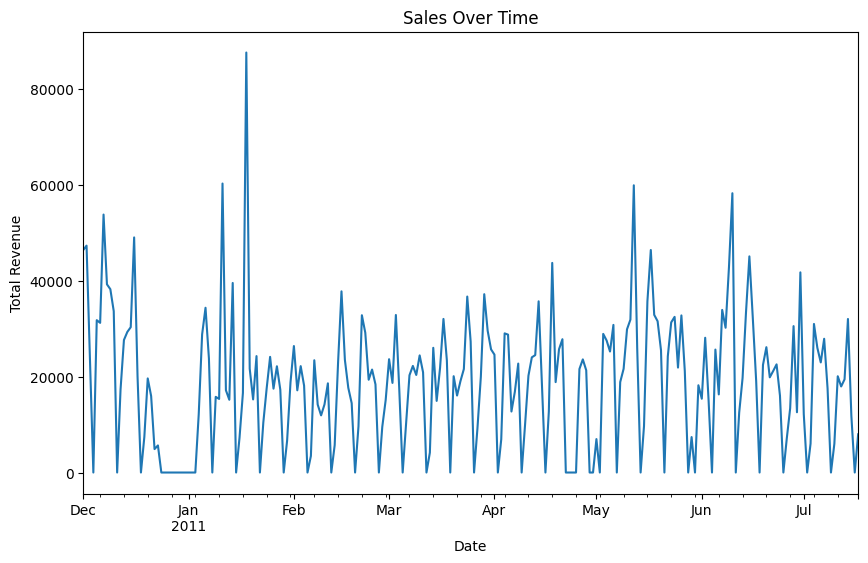

In [10]:
# Group data by InvoiceDate (by day) and sum the total revenue
sales_over_time = df_cleaned.resample('D', on='InvoiceDate')['TotalRevenue'].sum()

# Plot sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


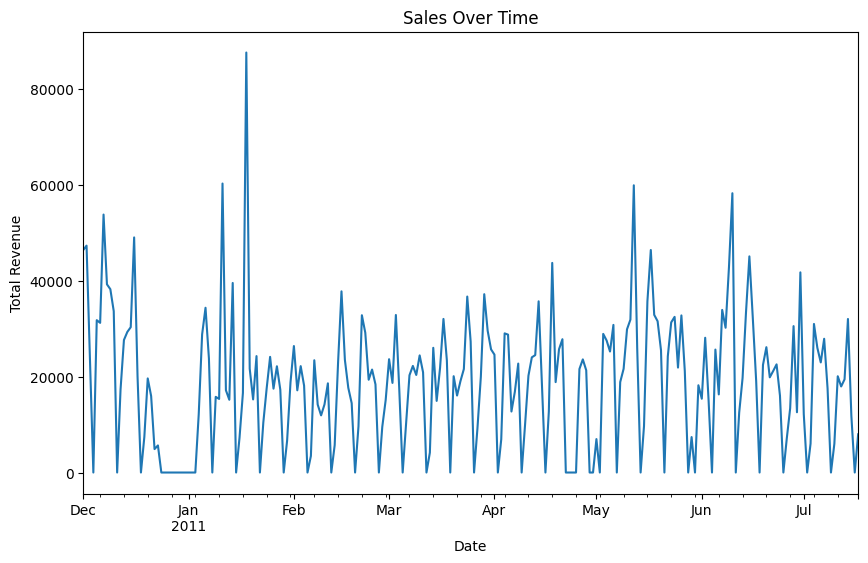

In [11]:
# Group data by InvoiceDate (by day) and sum the total revenue
sales_over_time = df_cleaned.resample('D', on='InvoiceDate')['TotalRevenue'].sum()

# Plot sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


In [12]:
# Segment customers by country
customer_country_segment = df_cleaned.groupby(['CustomerID', 'Country']).agg({
    'TotalRevenue': 'sum',  # Total revenue per customer
    'InvoiceNo': 'count'    # Number of transactions
}).reset_index()

print(customer_country_segment.head())


   CustomerID         Country  TotalRevenue  InvoiceNo
0     12346.0  United Kingdom      77183.60          1
1     12347.0         Iceland       2205.95        102
2     12348.0         Finland       1487.24         28
3     12350.0          Norway        334.40         17
4     12352.0          Norway       1561.81         38


In [13]:
# Calculate revenue per product and find the top 10 products by revenue
top_revenue_products = df_cleaned.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

print(top_revenue_products)


Description
REGENCY CAKESTAND 3 TIER              90004.30
MEDIUM CERAMIC TOP STORAGE JAR        78697.24
WHITE HANGING HEART T-LIGHT HOLDER    63435.44
PARTY BUNTING                         46215.60
POSTAGE                               43152.66
JUMBO BAG RED RETROSPOT               42502.46
PICNIC BASKET WICKER 60 PIECES        39619.50
ASSORTED COLOUR BIRD ORNAMENT         25737.24
CHILLI LIGHTS                         21582.01
Manual                                21341.14
Name: TotalRevenue, dtype: float64


MonthYear
2010-12    572713.890
2011-01    569445.040
2011-02    447137.350
2011-03    595500.760
2011-04    469200.361
2011-05    678594.560
2011-06    661213.690
2011-07    258919.420
Freq: M, Name: TotalRevenue, dtype: float64


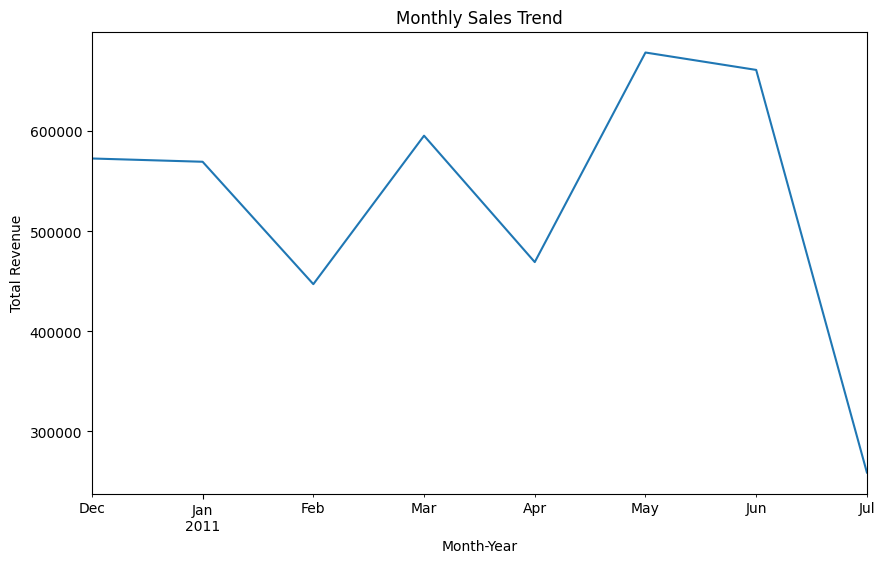

In [14]:
# Extract month and year from InvoiceDate
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by MonthYear and calculate total revenue
monthly_sales = df_cleaned.groupby('MonthYear')['TotalRevenue'].sum()

print(monthly_sales)

# Optional: Plot the trend
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.show()


In [15]:
# Calculate total revenue per invoice
df_cleaned['InvoiceRevenue'] = df_cleaned.groupby('InvoiceNo')['TotalRevenue'].transform('sum')

# Calculate average order value (AOV)
average_order_value = df_cleaned[['InvoiceNo', 'InvoiceRevenue']].drop_duplicates().InvoiceRevenue.mean()

print(f'Average Order Value: ${average_order_value:.2f}')


Average Order Value: $449.83


In [16]:
# Group by CustomerID and calculate the total revenue per customer
customer_lifetime_value = df_cleaned.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)

print(customer_lifetime_value.head(10))  # Top 10 customers by revenue


CustomerID
14646.0    136002.11
18102.0    119883.55
12346.0     77183.60
12415.0     77107.07
17450.0     66197.16
14156.0     54999.09
14911.0     50369.18
15749.0     44534.30
17511.0     42322.28
16029.0     40789.62
Name: TotalRevenue, dtype: float64


In [17]:
# Group by Country to calculate total sales and the number of unique customers
sales_by_country = df_cleaned.groupby('Country').agg({
    'TotalRevenue': 'sum',
    'CustomerID': pd.Series.nunique  # Number of unique customers
}).sort_values(by='TotalRevenue', ascending=False)

print(sales_by_country)


                      TotalRevenue  CustomerID
Country                                       
United Kingdom         3467903.401        2764
Netherlands             139844.570           8
Germany                 115268.900          61
EIRE                    109709.480           3
France                   96274.230          62
Australia                85266.200           9
Spain                    32937.040          22
Switzerland              24640.080          14
Japan                    23041.770           6
Sweden                   19698.880           5
Belgium                  18608.280          22
Portugal                 18597.070          12
Finland                  12285.110           6
Norway                   11570.190           5
Singapore                10262.650           1
Channel Islands           9893.420           7
Denmark                   9436.560           5
Cyprus                    8520.270           5
Italy                     6804.170           8
Poland       

In [18]:
# Group by CustomerID to calculate total revenue per customer
top_customers = df_cleaned.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

print(top_customers)


CustomerID
14646.0    136002.11
18102.0    119883.55
12346.0     77183.60
12415.0     77107.07
17450.0     66197.16
14156.0     54999.09
14911.0     50369.18
15749.0     44534.30
17511.0     42322.28
16029.0     40789.62
Name: TotalRevenue, dtype: float64


In [19]:
# Calculate total returned products per stock code (negative quantities indicate returns)
returned_products = df_cleaned[df_cleaned['Quantity'] < 0].groupby('StockCode')['Quantity'].sum().sort_values()

print(returned_products)


Series([], Name: Quantity, dtype: float64)


Hour
7      12549.380
8     138896.920
9     345382.341
10    672974.690
11    559119.050
12    649824.020
13    592456.690
14    452473.110
15    427607.710
16    216825.740
17    105148.490
18     47269.260
19     28484.920
20      3712.750
Name: TotalRevenue, dtype: float64


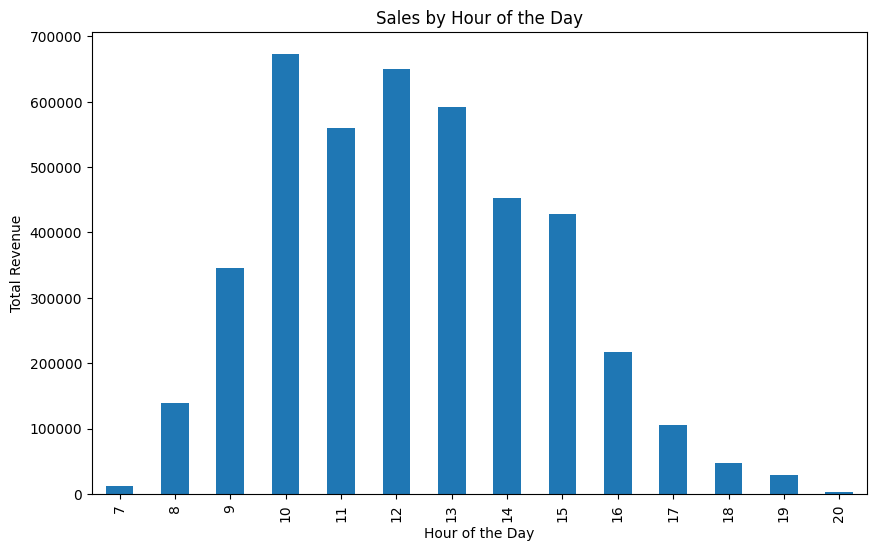

In [20]:
# Extract hour from InvoiceDate
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Group by hour and calculate total revenue
sales_by_hour = df_cleaned.groupby('Hour')['TotalRevenue'].sum()

print(sales_by_hour)

# Optional: Plot the result
sales_by_hour.plot(kind='bar', figsize=(10, 6), title='Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.show()


In [21]:
# Group by CustomerID and count the number of invoices
customer_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

print(customer_frequency.head(10))


CustomerID
12748.0    110
14911.0     81
17841.0     62
13089.0     60
14606.0     58
15311.0     53
12971.0     52
16029.0     37
13798.0     37
17850.0     34
Name: InvoiceNo, dtype: int64


In [22]:
# Group by Country and count the number of unique transactions (InvoiceNo)
transactions_by_country = df_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

print(transactions_by_country)


Country
United Kingdom          8534
Germany                  219
France                   194
EIRE                     112
Belgium                   54
Netherlands               46
Spain                     45
Australia                 33
Portugal                  29
Switzerland               26
Sweden                    17
Finland                   16
Italy                     15
Poland                    13
Norway                    12
Japan                     12
Channel Islands           10
Austria                   10
Cyprus                    10
Denmark                    7
Canada                     5
Singapore                  4
Unspecified                4
Lithuania                  4
Iceland                    4
Greece                     4
European Community         3
Malta                      2
Israel                     2
Bahrain                    2
Czech Republic             1
Lebanon                    1
Saudi Arabia               1
Brazil                     1
USA   